In [1]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [6]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

load_raw_to_epochs('da.bdf', True)

Extracting EDF parameters from C:\Users\Alberto\Documents\BCI\data\da\da.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7501823  =      0.000 ...  3663.000 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)



C:\Users\Alberto\Documents\BCI\data\da\../../preprocessing\load_data.py:35: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The required channels are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:   11.1s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:   41.3s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   43.0s finished


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
119 events found
Event IDs: [  2   4 130 134 255]
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 20481 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1016 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 3896 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 7928 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done 8680 out of 8687 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 8687 out of 8687 | elapsed:   12.3s finished


Overwriting existing file.
saved


In [12]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\da\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 7288 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 8568 out of 8568 | elapsed:    8.1s finished


Using matplotlib as 2D backend.


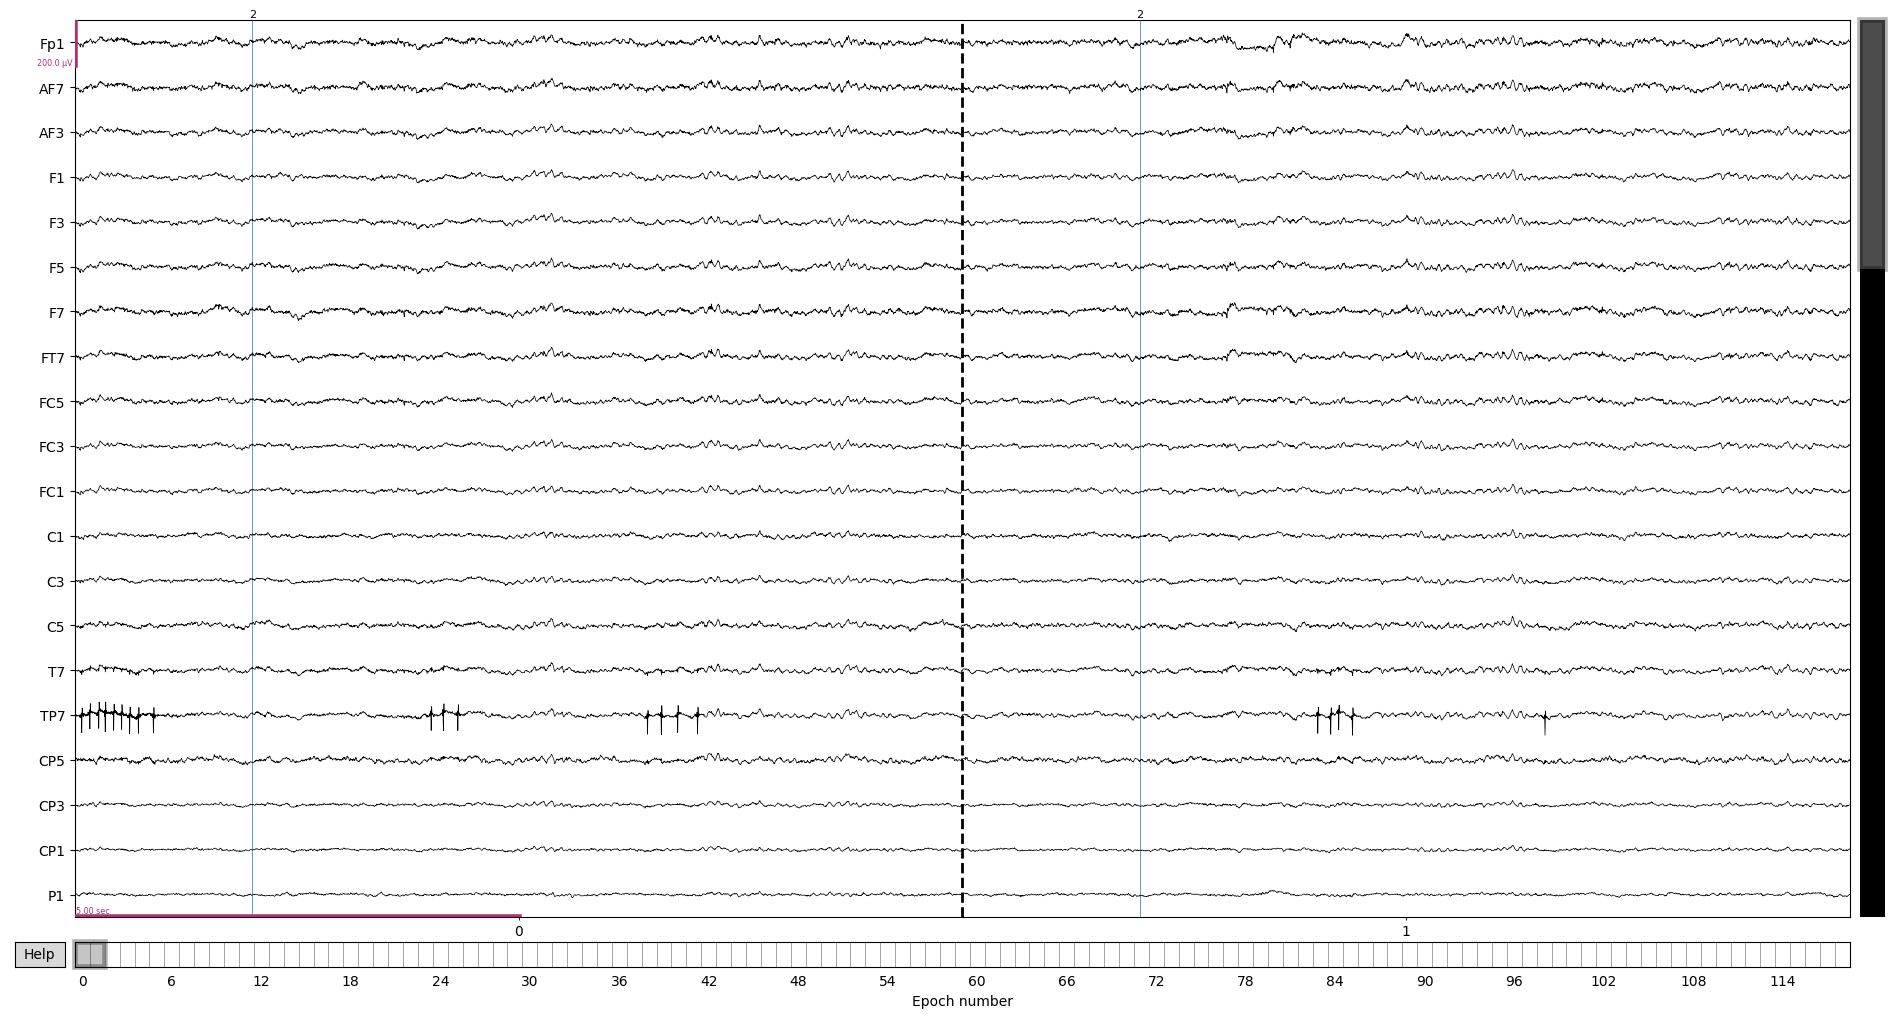

In [4]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-5, events=raw.events, picks=['eeg','eog'])

Marking bad chanels

In [13]:
bads = ['EXG5','EXG7','FT8', 'F8', 'F6','Fpz', 'P9', 'P10', 'TP7', 'AF8', 'Iz', 'F8', 'P9', 'F2', 'P10','Fp2','C4'] 
raw.info['bads'] = bads

Referencing

In [14]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [15]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  119 events (all good), -2 - 7.99902 sec, baseline off, ~678.8 MB, data loaded,
 'r_pinch': 26
 'r_stop': 25
 'left': 27
 'right': 24
 'rest': 17>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1272 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 6970 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 7616 out of 7616 | elapsed:    8.1s finished


Using matplotlib as 2D backend.


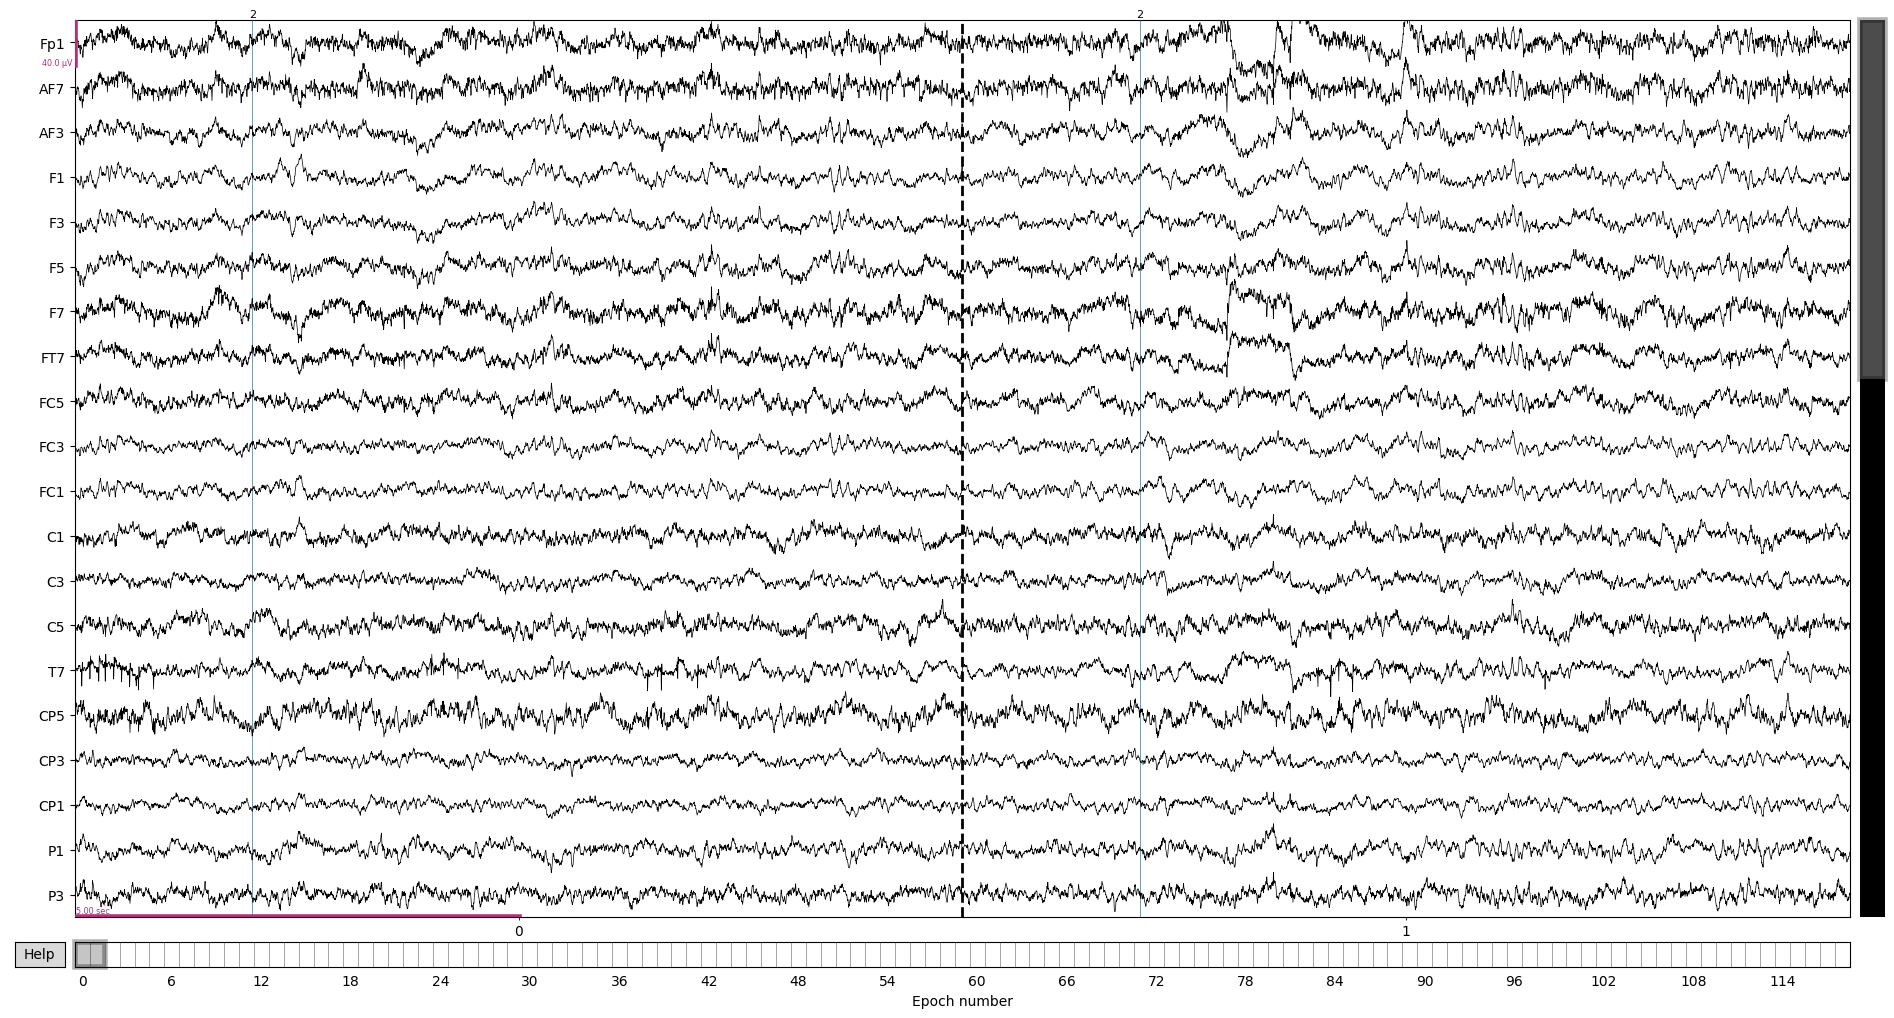

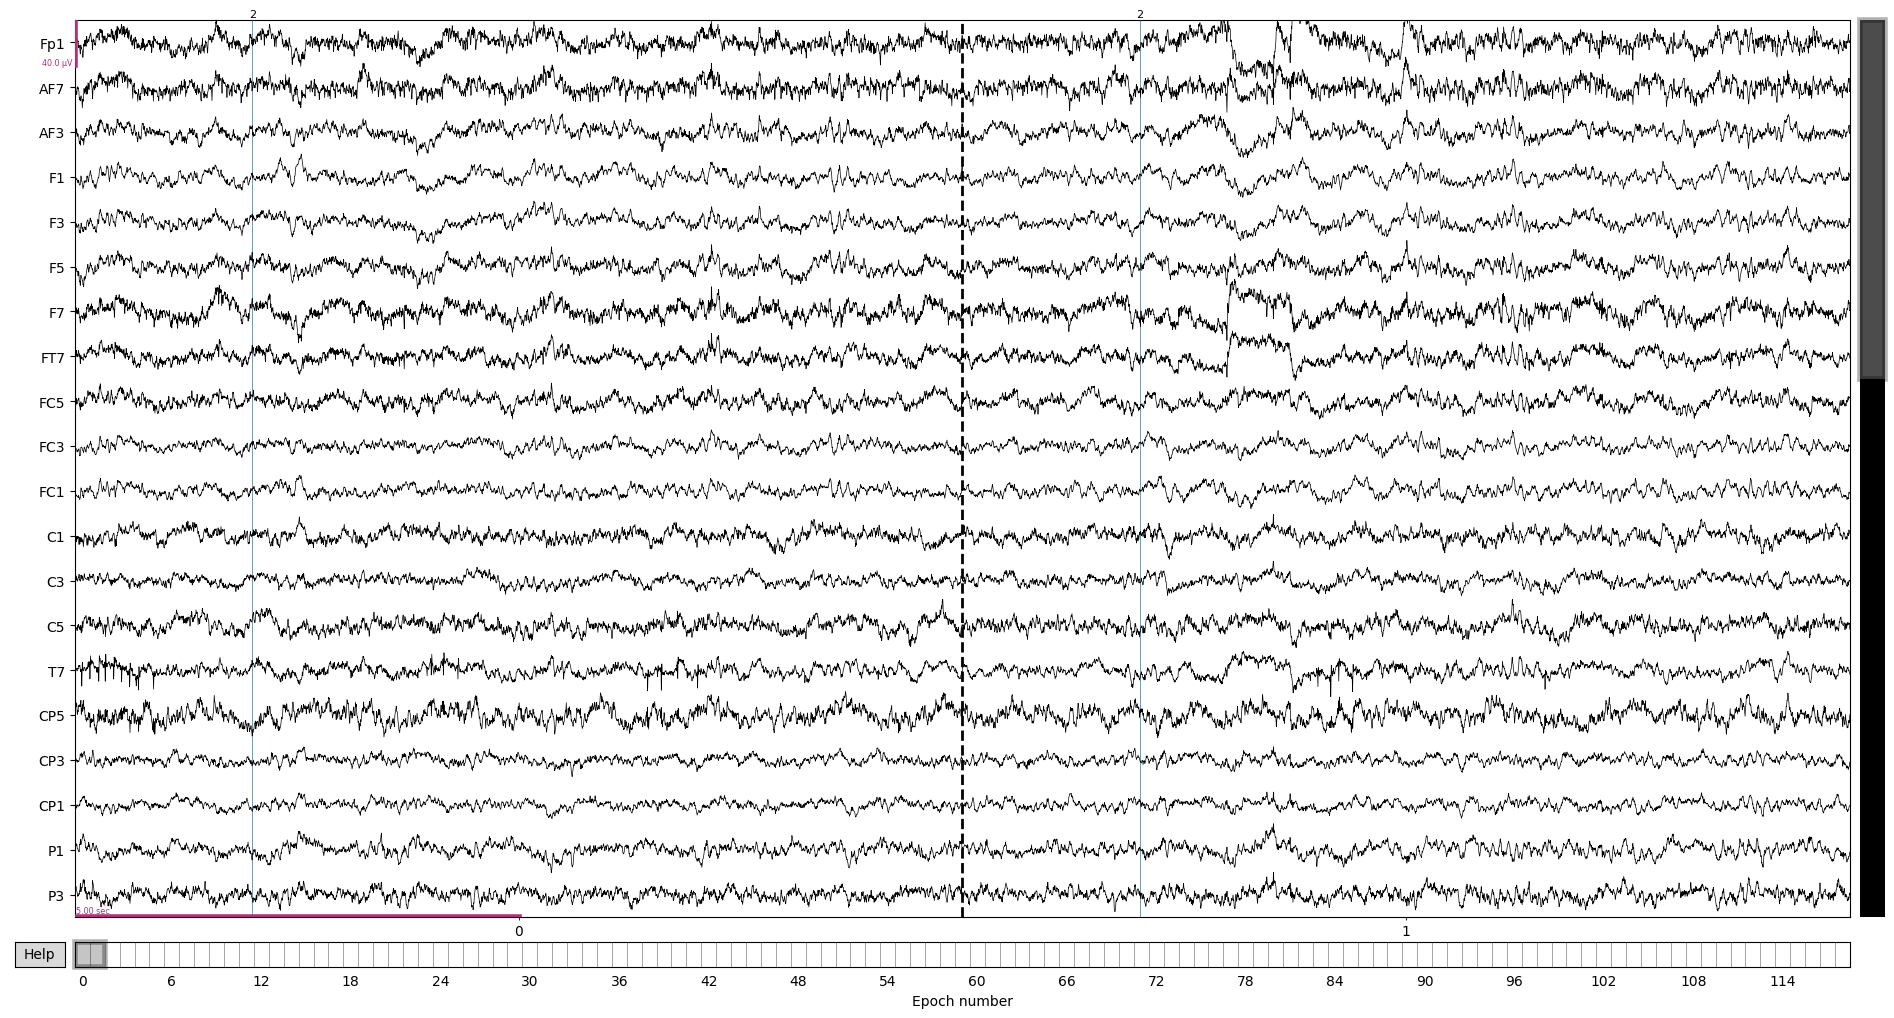

In [8]:
referenced.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-6, events=referenced.events, picks=['eeg','eog'])

In [16]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

Overwriting existing file.


REMOVE ARTIFACTS


In [2]:
epochs = read_epochs('referenced_epo.fif')
epochs.drop([2, 7, 9, 11, 17, 21, 23, 28, 44, 53, 55, 57, 60, 70, 72, 80, 84, 89, 91, 92, 97, 100, 102, 107, 112, 115, 116, 117])

Reading C:\Users\Alberto\Documents\BCI\data\da\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Dropped 28 epochs: 2, 7, 9, 11, 17, 21, 23, 28, 44, 53, 55, 57, 60, 70, 72, 80, 84, 89, 91, 92, 97, 100, 102, 107, 112, 115, 116, 117


<EpochsFIF |  91 events (all good), -2 - 7.99902 sec, baseline off, ~519.1 MB, data loaded,
 'r_pinch': 25
 'r_stop': 24
 'left': 21
 'right': 17
 'rest': 4>

In [18]:
epochs['left'].plot_psd(fmax=110, tmin=0, tmax=4)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Remove EOG by Regression

No projector specified for this dataset. Please consider the method self.add_proj.


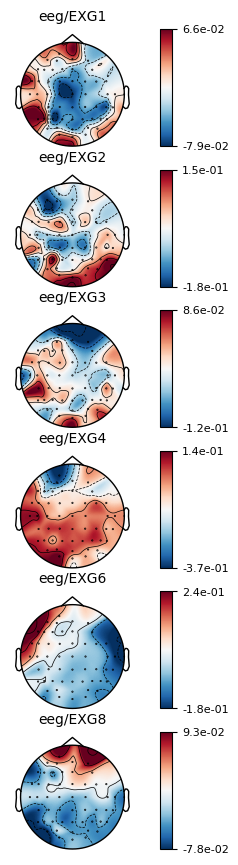

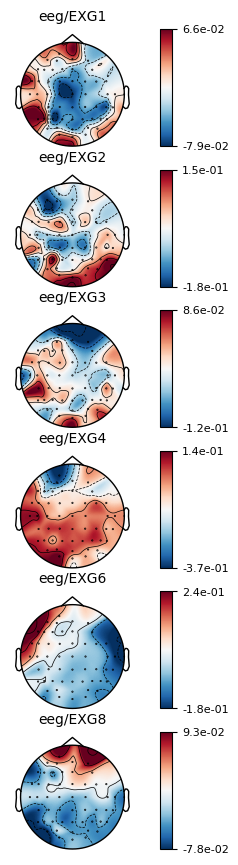

In [4]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8']).fit(epochs)
regressor.plot()

In [5]:
epochs = regressor.apply(epochs)

No projector specified for this dataset. Please consider the method self.add_proj.


ICA

In [6]:
filtered = epochs.copy().crop(-1,1.4).filter(1,120, n_jobs=8)
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



C:\Users\Alberto\AppData\Local\Temp\ipykernel_14112\645214533.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (2459), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = epochs.copy().crop(-1,1.4).filter(1,120, n_jobs=8)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 303 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done 3984 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done 5824 out of 5824 | elapsed:    9.3s finished


Fitting ICA to data using 52 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 13.0s.


<ICA | epochs decomposition, method: picard (fit in 46 iterations on 223769 samples), 10 ICA components (52 PCA components available), channel types: eeg, no sources marked for exclusion>

In [7]:
plot_ica_components(ica)

[<MNEFigure size 975x496 with 10 Axes>]

C:\Users\Alberto\AppData\Local\Temp\ipykernel_11756\1149282951.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (1947), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','rest'].copy().crop(-0.5,1.4).filter(1,120, verbose=False),


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection i

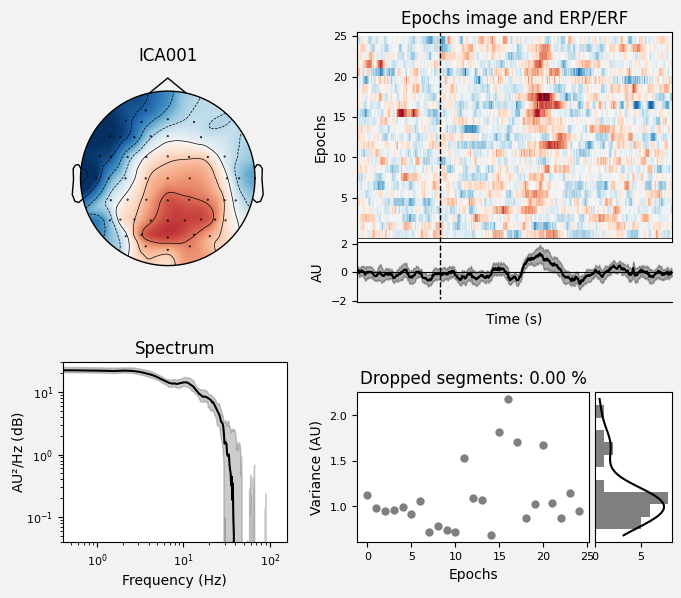

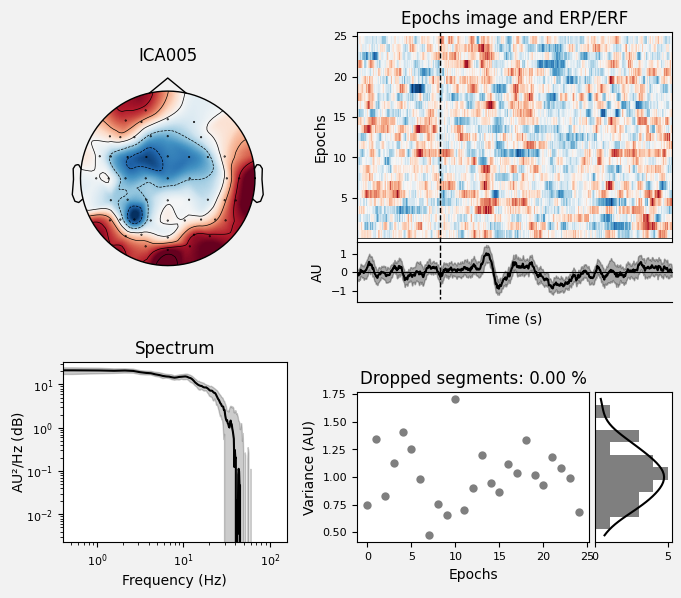

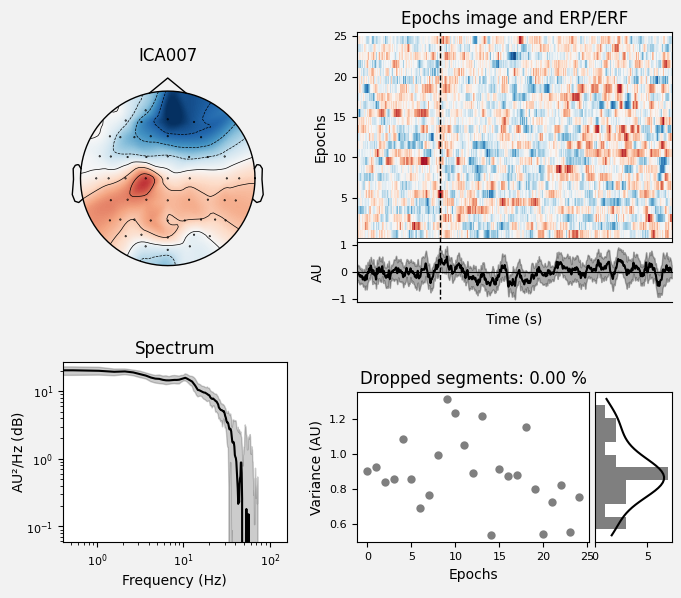

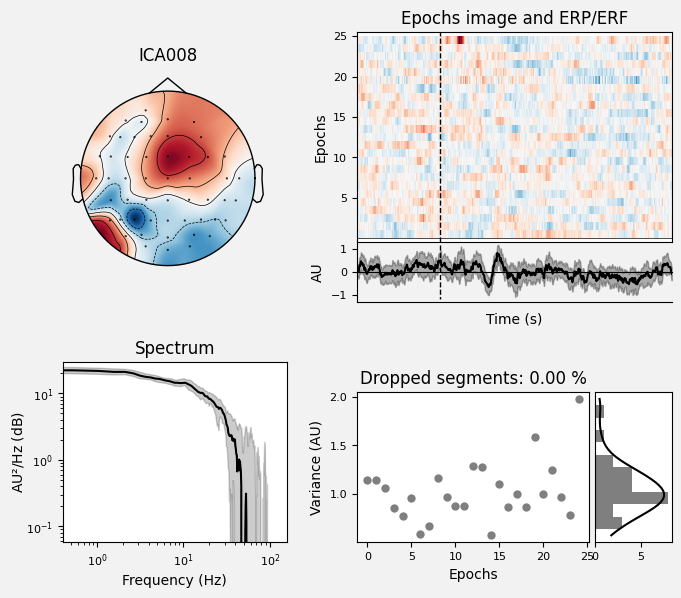

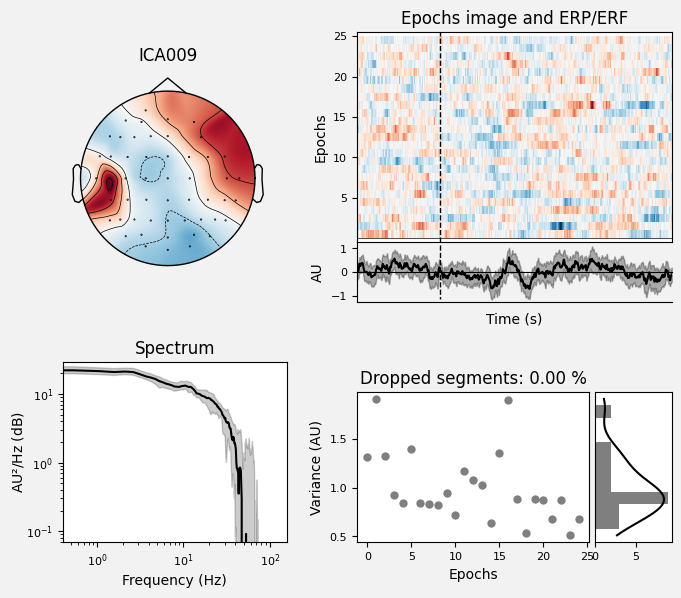

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [11]:
ica.plot_properties(
    epochs['left','rest'].copy().crop(-0.5,1.4).filter(1,120, verbose=False), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = True,
    psd_args = dict(fmax=120))

In [8]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['r_pinch'],
    ch_name=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8'], 
    measure='zscore',
    threshold=1.3)


Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG6, EXG8


In [9]:
eog_indices


[0, 9, 6, 5, 1, 3, 7, 4, 2]

In [36]:
ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_14288\1950003828.py:1: RuntimeWarning: More than one ECG channel found. Using only EXG1.
  ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


In [31]:
ecg_indices


[5, 3, 1, 6]

In [32]:
exclude = eog_indices + ecg_indices 
np.unique(exclude)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
ica.apply(epochs, exclude=[0,1,2,7,8,9])

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 6 ICA components
    Projecting back using 52 PCA components


<EpochsFIF |  91 events (all good), -2 - 7.99902 sec, baseline off, ~519.1 MB, data loaded,
 'r_pinch': 25
 'r_stop': 24
 'left': 21
 'right': 17
 'rest': 4>

In [11]:
epochs.save('ica_epo.fif', overwrite=True)

Overwriting existing file.
